# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## Making Predictions

In [8]:
def forward(x):
    y = w * x + b
    return y


tabulation = Form_Generator()
tabulation.heading_printer("Definition of prediction function")

definition = """
def forward(x):
    y = w * x + b
    return y
"""
definitions = [definition]
tabulation.definition_generator(definitions)

Definition of prediction function

    +-------------------+
    | Definition        |
    +-------------------+
    | def forward(x):   |
    |     y = w * x + b |
    |     return y      |
    +-------------------+


In [9]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

tabulation = Form_Generator()
tabulation.heading_printer("Initial assignment of parameters")

statement_1 = "w = torch.tensor(3.0, requires_grad=True)"
statement_2 = "b = torch.tensor(1.0, requires_grad=True)"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["w", "b"]
values = [str(w), str(b)]
tabulation.variable_generator(variables, values)

Initial assignment of parameters

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | w = torch.tensor(3.0, requires_grad=True) |
    | b = torch.tensor(1.0, requires_grad=True) |
    +-------------------------------------------+
    +----------+--------------------------------+
    | Variable | Value                          |
    +----------+--------------------------------+
    | w        | tensor(3., requires_grad=True) |
    | b        | tensor(1., requires_grad=True) |
    +----------+--------------------------------+


In [10]:
x = torch.tensor(2)

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with 0D tensor")

statement_1 = "x = torch.tensor(2)"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with 0D tensor

    +---------------------+
    | Statement           |
    +---------------------+
    | x = torch.tensor(2) |
    +---------------------+
    +----------+-----------+
    | Variable | Value     |
    +----------+-----------+
    | x        | tensor(2) |
    +----------+-----------+
    +------------+------------------------------------+
    | Expression | Result                             |
    +------------+------------------------------------+
    | forward(x) | tensor(7., grad_fn=<AddBackward0>) |
    +------------+------------------------------------+


In [11]:
x = torch.tensor([[4], [7]])

tabulation = Form_Generator()
tabulation.heading_printer("Function implementation with multi-D tensor")

statement_1 = "x = torch.tensor([[4], [7]])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["forward(x)"]
results = [str(forward(x))]
tabulation.expression_generator(expressions, results)

Function implementation with multi-D tensor

    +------------------------------+
    | Statement                    |
    +------------------------------+
    | x = torch.tensor([[4], [7]]) |
    +------------------------------+
    +----------+---------------+
    | Variable | Value         |
    +----------+---------------+
    | x        | tensor([[4],  |
    |          |         [7]]) |
    +----------+---------------+
    +------------+-----------------------------------------+
    | Expression | Result                                  |
    +------------+-----------------------------------------+
    | forward(x) | tensor([[13.],                          |
    |            |         [22.]], grad_fn=<AddBackward0>) |
    +------------+-----------------------------------------+


## Linear Class

In [12]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of standard linear model")

statement_1 = "torch.manual_seed(1)"
statement_2 = "model = nn.Linear(in_features=1, out_features=1)"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.weight", "model.bias"]
results = [str(model.weight), str(model.bias)]
tabulation.expression_generator(expressions, results)

Initialization of standard linear model

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | torch.manual_seed(1)                             |
    | model = nn.Linear(in_features=1, out_features=1) |
    +--------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | model    | Linear(in_features=1, out_features=1, bias=True) |
    +----------+--------------------------------------------------+
    +--------------+----------------------------------------+
    | Expression   | Result                                 |
    +--------------+----------------------------------------+
    | model.weight | Parameter containing:                  |
    |              | tensor([

In [13]:
x = torch.tensor([2.0])

tabulation = Form_Generator()
tabulation.heading_printer("Model implementation with 1D tensor")

statement_1 = "x = torch.tensor([2.0])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Model implementation with 1D tensor

    +-------------------------+
    | Statement               |
    +-------------------------+
    | x = torch.tensor([2.0]) |
    +-------------------------+
    +----------+--------------+
    | Variable | Value        |
    +----------+--------------+
    | x        | tensor([2.]) |
    +----------+--------------+
    +------------+------------------------------------------+
    | Expression | Result                                   |
    +------------+------------------------------------------+
    | model(x)   | tensor([0.5891], grad_fn=<AddBackward0>) |
    +------------+------------------------------------------+


In [14]:
x = torch.tensor([[2.0], [3.3]])

tabulation = Form_Generator()
tabulation.heading_printer("Model implementation with multi-D tensor")

statement_1 = "x = torch.tensor([[2.0], [3.3]])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model(x)"]
results = [str(model(x))]
tabulation.expression_generator(expressions, results)

Model implementation with multi-D tensor

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | x = torch.tensor([[2.0], [3.3]]) |
    +----------------------------------+
    +----------+--------------------+
    | Variable | Value              |
    +----------+--------------------+
    | x        | tensor([[2.0000],  |
    |          |         [3.3000]]) |
    +----------+--------------------+
    +------------+----------------------------------------------+
    | Expression | Result                                       |
    +------------+----------------------------------------------+
    | model(x)   | tensor([[0.5891],                            |
    |            |         [1.2590]], grad_fn=<AddmmBackward0>) |
    +------------+----------------------------------------------+


## Custom Modules

In [15]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred


tabulation = Form_Generator()
tabulation.heading_printer("Initialization of inherited linear classes")

definition = """
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred
"""

definitions = [definition]
tabulation.definition_generator(definitions)

statement_1 = "torch.manual_seed(1)"
statement_2 = "model = LR(1, 1)"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.parameters()", "list(model.parameters())"]
results = [str(model.parameters()), str(list(model.parameters()))]
tabulation.expression_generator(expressions, results)

Initialization of inherited linear classes

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | class LR(nn.Module):                                     |
    |                                                          |
    |     def __init__(self, input_size, output_size):         |
    |         super().__init__()                               |
    |         self.linear = nn.Linear(input_size, output_size) |
    |                                                          |
    |     def forward(self, x):                                |
    |         pred = self.linear(x)                            |
    |         return pred                                      |
    +----------------------------------------------------------+
    +----------------------+
    | Statement            |
    +----------------------+
    | torch.manual_seed(

In [16]:
x = torch.tensor([1.0])

tabulation = Form_Generator()
tabulation.heading_printer("Implementation of custom model with 1D tensor")

statement_1 = "x = torch.tensor([1.0])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model.forward(x)"]
results = [str(model.forward(x))]
tabulation.expression_generator(expressions, results)

Implementation of custom model with 1D tensor

    +-------------------------+
    | Statement               |
    +-------------------------+
    | x = torch.tensor([1.0]) |
    +-------------------------+
    +----------+--------------+
    | Variable | Value        |
    +----------+--------------+
    | x        | tensor([1.]) |
    +----------+--------------+
    +------------------+------------------------------------------+
    | Expression       | Result                                   |
    +------------------+------------------------------------------+
    | model.forward(x) | tensor([0.0739], grad_fn=<AddBackward0>) |
    +------------------+------------------------------------------+


In [17]:
x = torch.tensor([[1.0], [2.0]])

tabulation = Form_Generator()
tabulation.heading_printer(
    "Implementation of custom model with multi-D tensor")

statement_1 = "x = torch.tensor([[1.0], [2.0]])"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["x"]
values = [str(x)]
tabulation.variable_generator(variables, values)

expressions = ["model.forward(x)"]
results = [str(model.forward(x))]
tabulation.expression_generator(expressions, results)

Implementation of custom model with multi-D tensor

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | x = torch.tensor([[1.0], [2.0]]) |
    +----------------------------------+
    +----------+----------------+
    | Variable | Value          |
    +----------+----------------+
    | x        | tensor([[1.],  |
    |          |         [2.]]) |
    +----------+----------------+
    +------------------+-----------------------------------+
    | Expression       | Result                            |
    +------------------+-----------------------------------+
    | model.forward(x) | tensor([[0.0739],                 |
    |                  |         [0.5891]],                |
    |                  |         grad_fn=<AddmmBackward0>) |
    +------------------+-----------------------------------+


## Creating Dataset

In [18]:
X = torch.randn(100, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of normally distributed data with random numbers")

statement_1 = "X = torch.randn(100, 1)"
statements = [statement_1]
tabulation.statement_generator(statements)

variables = ["X"]
values = [str(reprlib_rules.repr(X))]
tabulation.variable_generator(variables, values)

expressions = ["X.size()", "X[0]", "X[-1]"]
results = [str(X.size()), str(X[0]), str(X[-1])]
tabulation.expression_generator(expressions, results)

Creation of normally distributed data with random numbers

    +-------------------------+
    | Statement               |
    +-------------------------+
    | X = torch.randn(100, 1) |
    +-------------------------+
    +----------+-----------------------+
    | Variable | Value                 |
    +----------+-----------------------+
    | X        | tensor([[-0.6540],    |
    |          |         [-1.6095],    |
    |          |         [-0.1002],    |
    |          |         [-0.6092],    |
    |          |         [-0.9798],    |
    |          |         [-1.6091],    |
    |          |         [...-1.1334], |
    |          |         [-0.1010],    |
    |          |         [ 0.3434],    |
    |          |         [-1.0703],    |
    |          |         [-0.8743],    |
    |          |         [-1.4648],    |
    |          |         [-1.2629]])   |
    +----------+-----------------------+
    +------------+----------------------+
    | Expression | Result               |


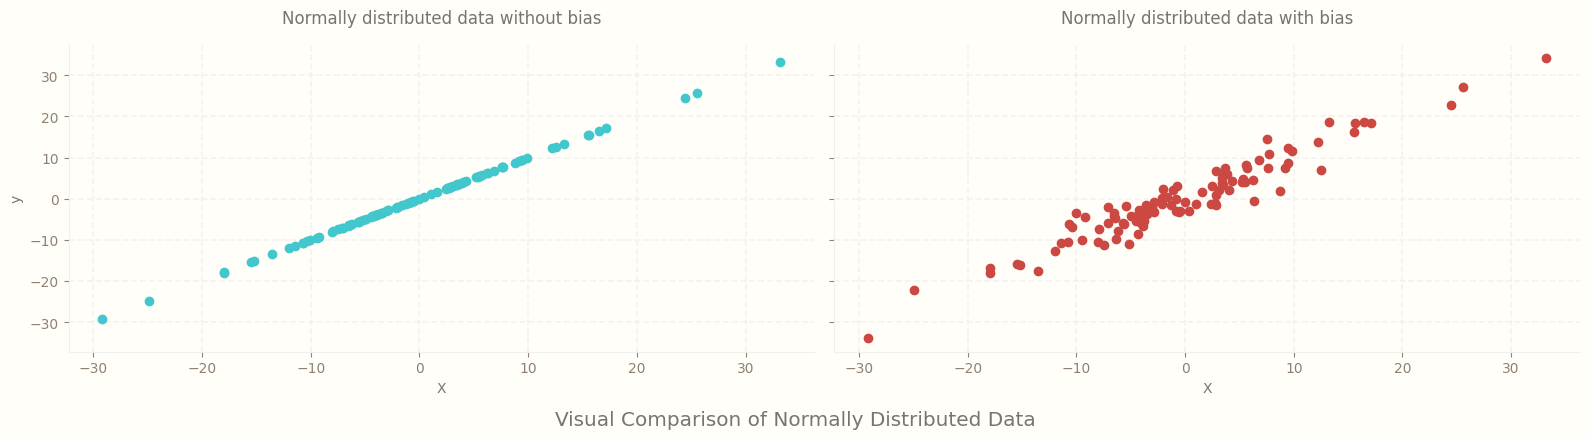

In [19]:
colors = calm_color_generator(2)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

X = torch.randn(100, 1) * 10
y = X
axs[0].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[0].set_title("Normally distributed data without bias",
                 loc="center",
                 pad=15)

y = X + 3 * torch.randn(100, 1)
axs[1].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[1].set_title("Normally distributed data with bias", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle("Visual Comparison of Normally Distributed Data",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [20]:
w, b = model.parameters()
w1 = w[0][0]
b1 = b[0]

tabulation = Form_Generator()
tabulation.heading_printer("Model parameter unpacking")

statement_1 = "w, b = model.parameters()"
statement_2 = "w1 = w[0][0]"
statement_3 = "b1 = b[0]"
statements = [statement_1] + [statement_2] + [statement_3]
tabulation.statement_generator(statements)

variables = ["w", "b", "w1", "b1"]
values = [str(w), str(b), str(w1), str(b1)]
tabulation.variable_generator(variables, values)

Model parameter unpacking

    +---------------------------+
    | Statement                 |
    +---------------------------+
    | w, b = model.parameters() |
    | w1 = w[0][0]              |
    | b1 = b[0]                 |
    +---------------------------+
    +----------+--------------------------------------------+
    | Variable | Value                                      |
    +----------+--------------------------------------------+
    | w        | Parameter containing:                      |
    |          | tensor([[0.5153]], requires_grad=True)     |
    | b        | Parameter containing:                      |
    |          | tensor([-0.4414], requires_grad=True)      |
    | w1       | tensor(0.5153, grad_fn=<SelectBackward0>)  |
    | b1       | tensor(-0.4414, grad_fn=<SelectBackward0>) |
    +----------+--------------------------------------------+


In [21]:
w1 = w[0][0].item()
b1 = b[0].item()

tabulation = Form_Generator()
tabulation.heading_printer("Value extraction by unpacking model parameters")

statement_1 = "w1 = w[0][0].item()"
statement_2 = "b1 = b[0].item()"
statements = [statement_1] + [statement_2]
tabulation.statement_generator(statements)

variables = ["w1", "b1"]
values = [str(w1), str(b1)]
tabulation.variable_generator(variables, values)

Value extraction by unpacking model parameters

    +---------------------+
    | Statement           |
    +---------------------+
    | w1 = w[0][0].item() |
    | b1 = b[0].item()    |
    +---------------------+
    +----------+----------------------+
    | Variable | Value                |
    +----------+----------------------+
    | w1       | 0.5152631998062134   |
    | b1       | -0.44137823581695557 |
    +----------+----------------------+


In [22]:
def get_params():
    return (w[0][0].item(), b[0].item())


def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    colors = calm_color_generator(1)
    plt.scatter(X, y, color=colors[0])
    plt.show()


tabulation = Form_Generator()
tabulation.heading_printer("Definition of visualization function")

definition = """
def get_params():
    return (w[0][0].item(), b[0].item())


def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    colors = calm_color_generator(1)
    plt.scatter(X, y, color=colors[0])
    plt.show()
"""

definitions = [definition]
tabulation.definition_generator(definitions)

Definition of visualization function

    +------------------------------------------+
    | Definition                               |
    +------------------------------------------+
    | def get_params():                        |
    |     return (w[0][0].item(), b[0].item()) |
    |                                          |
    |                                          |
    | def plot_fit(title):                     |
    |     plt.title = title                    |
    |     w1, b1 = get_params()                |
    |     x1 = np.array([-30, 30])             |
    |     y1 = w1 * x1 + b1                    |
    |     plt.plot(x1, y1, "r")                |
    |     colors = calm_color_generator(1)     |
    |     plt.scatter(X, y, color=colors[0])   |
    |     plt.show()                           |
    +------------------------------------------+


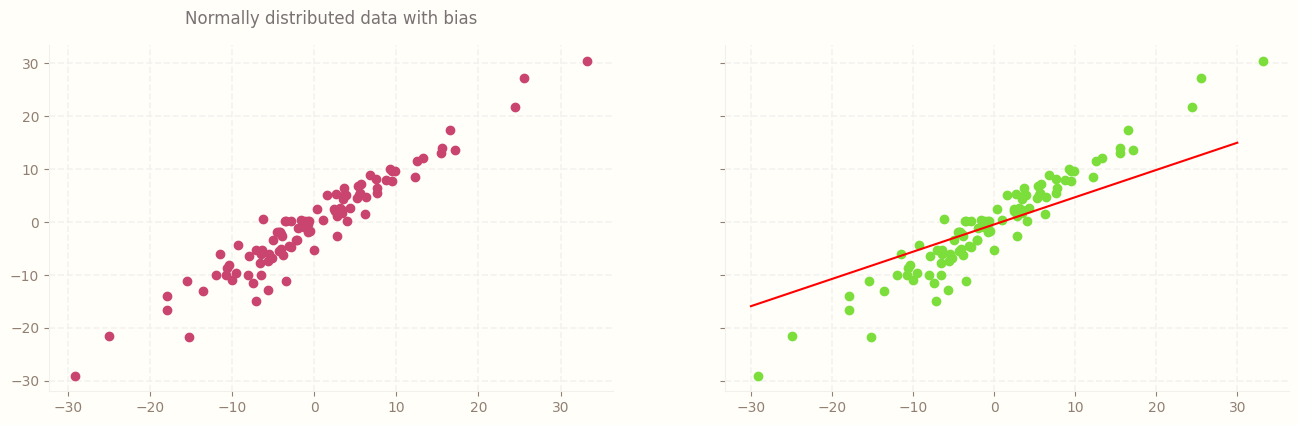

<Figure size 1600x450 with 0 Axes>

In [29]:
colors = calm_color_generator(2)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

y = X + 3 * torch.randn(100, 1)
axs[0].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[0].set_title("Normally distributed data with bias", loc="center", pad=15)


plot_fit("Initial Model")

y = X + 3 * torch.randn(100, 1)
axs[1].plot(X.numpy(), y.numpy(), "o", c=colors.pop(0))
axs[1].set_title("Normally distributed data with bias", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.label_outer()

fig.suptitle("Visual Comparison of Normally Distributed Data",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

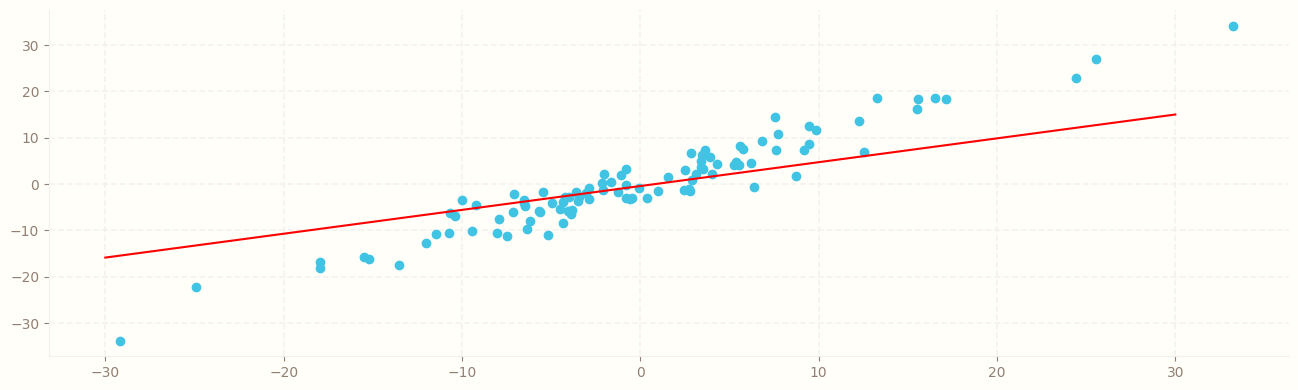

In [23]:
plot_fit("Initial Model")

# Training - Code Implementation

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002)

In [25]:
print(criterion)

MSELoss()


In [26]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0002
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [27]:
epochs = 100
losses = []
termcolors = [
    "grey", "red", "green", "yellow", "blue", "magenta", "cyan", "white"
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i == 1 or i % 10 == 0:
        print(colored("epoch:", font_colors[0], attrs=["bold"]), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NameError: name 'random' is not defined

In [ ]:
colors = calm_color_generator(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
plot_fit("Trained Model")